In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import stats
import mlxtend as ml       #download externo de biblioteca
import mlxtend.frequent_patterns.apriori as apriori
import mlxtend.frequent_patterns.association_rules as association_rules

In [2]:
dbrutos = pd.read_csv("bank-full.csv", delimiter = ';')    #abrir csv como data frame
dbrutos

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


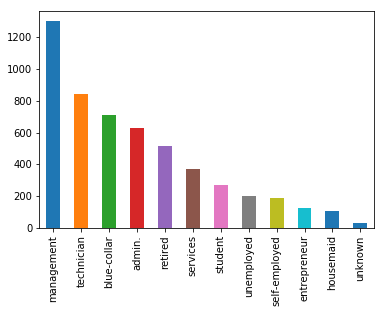

In [3]:
sucessos = dbrutos.loc[(dbrutos['job'] != 0) & (dbrutos['y'] == 'yes')]
qtdsucesso = sucessos['job'].value_counts()   #diz qual profissão teve mais sucesso nas campanhas
qtdsucesso.plot.bar()

In [4]:
falhas = dbrutos.loc[(dbrutos['job'] != 0) & (dbrutos['y'] == 'no')]
qtdfalhas = falhas['job'].value_counts()   #diz qual profissão teve menos sucesso nas campanhas
qtdfalhas#.plot.bar()

blue-collar      9024
management       8157
technician       6757
admin.           4540
services         3785
retired          1748
self-employed    1392
entrepreneur     1364
housemaid        1131
unemployed       1101
student           669
unknown           254
Name: job, dtype: int64

In [5]:
totaljobs = dbrutos['job'].value_counts()
totaljobs.sum()

45211

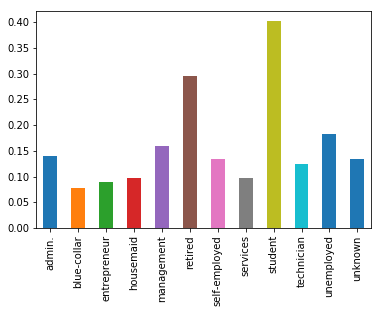

In [6]:
#a melhor taxa de conversão é a dos estudantes, com 40%.
taxadesucesso = (qtdsucesso/qtdfalhas)
taxadesucesso.plot.bar()

In [7]:
studantloanh = dbrutos.loc[(dbrutos['job'] == 'student') & (dbrutos['housing'] == 'yes')]
studantloanh['job'].value_counts()

student    249
Name: job, dtype: int64

In [8]:
studantloan = dbrutos.loc[(dbrutos['job'] == 'student') & (dbrutos['loan'] == 'yes')]
studantloan['job'].value_counts()

student    12
Name: job, dtype: int64

1) A profissão com maior tendência de contratar empréstimo é a de estudantes, pois possui a maior taxa de conversão (40%) para as ofertas entre todas profissões. A oferta mais popular entre os estudantes é a da modalidade housing. Ainda, é notável que devido ao número superior de gerentes na base, os impréstimos concedidos aos gerentes representam 25% do total de empréstimos, mas sua taxa de conversão é somente de 15%.

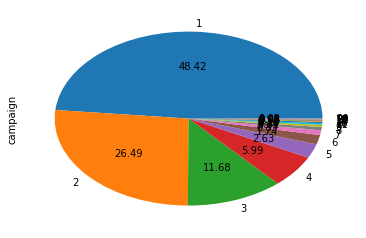

In [9]:
#contatos com sucesso e ligações
contatoscomsucesso = dbrutos.loc[(dbrutos['campaign'] !=0) & (dbrutos['y'] == 'yes')]
contatoscomsucesso['campaign'].value_counts().plot.pie(autopct='%.2f')

In [10]:
contatoscomsucesso['campaign'].value_counts()

1     2561
2     1401
3      618
4      317
5      139
6       92
7       47
8       32
9       21
11      16
10      14
13       6
17       6
12       4
14       4
15       4
16       2
21       1
29       1
32       1
24       1
20       1
Name: campaign, dtype: int64

In [11]:
amedia = np.mean(contatoscomsucesso['campaign'])
amediana = np.median(contatoscomsucesso['campaign'])
amoda = stats.mode(contatoscomsucesso['campaign'])
print( "A ","média ", amedia,"mediana ", amediana,"moda ", amoda[0])

A  média  2.1410474569861977 mediana  2.0 moda  [1]


2) Sobre a relação entre número de contatos e o sucesso da campanha é notável que a mediana e a média são próximas a 2 ligações, isso significa que a maior parte das conversões da campanha acontecem até o segundo contato. É possível observar também que a moda é igual a 1, significando que a maior parte das conversões aconteceu na primeira ligação desta campanha. No gráfico que exemplifica os percentuais é evidenciado o percentual de sucesso da primeira ligação (48,42%).

3) A média atual das conversões de ligações por sucesso é de 2,14, sendo que 48,42% dos sucessos aconteceram na primeira ligação, 26,49% para a segunda e 11,68% para terceira ligação. Para otimizar os esforços, a proposta é de que o número máximo de ligações para o mesmo cliente deva ser de 3 contatos, pois o sucesso de até 3 ligações somados representam quase 90% das conversões. É necessário também que mais de 50% dos casos a conversão aconteça na primeira ligação, para que a média ideal de conversões por ligação seja menor que 2.

In [12]:
campanhaanterior = dbrutos.loc[(dbrutos['poutcome'] == 'success') & (dbrutos['y'] != 0)]
campanhaanterior['y'].value_counts()

yes    978
no     533
Name: y, dtype: int64

In [13]:
#todos os sucessos dessa campanha receberam ligações da camapanha anterior
anterioreatual = dbrutos.loc[(dbrutos['poutcome'] != 0) & (dbrutos['y'] == 'yes')]
anterioreatual#['campaign'].sum()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
270,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
388,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
390,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
457,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes


In [14]:
# prevalencia de vendas
prev = dbrutos.loc[(dbrutos['poutcome'] == 'success')]
prevalencia = dbrutos.loc[(dbrutos['poutcome'] == 'success') & (dbrutos['y'] == 'yes')]
prevalencia['poutcome'].value_counts()

success    978
Name: poutcome, dtype: int64

In [15]:
# de todas as pessoas da campanha anterior
tdsanterior = dbrutos.loc[(dbrutos['poutcome'] != 0) & (dbrutos['y'] != 0)]
tdsanterior['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

4) Todas as pessoas da campanha anterior estão na atual e receberam ao menos uma ligação na campanha anterior. É difícil estabelecer uma relação de depência comportamental dos eventos da campanha anterior e atual, mas é fato que todos os sucessos da campanha atual também receberam ligações da campanha anterior. De 1511 conversões da primeira campanha, 978 voltaram a comprar na campanha atual, uma retenção de 64%. Ainda, a média de ligações de sucesso somando campanha anterior e atual é de 3,81. Portanto, Há um relação de fidelização de mais da metade das conversões da primeira campanha e elas impactam na no aceite da campanha atual.

5) Provavelmente se o cliente não tem renda declarada ou se já tem um crédito contratado, mas não há dados para explorar essa hipótese pois não encontrei uma coluna indicando o seguro de crédito.

In [16]:
#uso de biblioteca externa para gerar regras de associação
dados = dbrutos[['job','marital','education','housing','loan','default','poutcome','y',]]
dadosdummy = pd.get_dummies(dados)
dadosdummy
freq_itemsets = apriori(dadosdummy, min_support=0.30, use_colnames=True)
regras = association_rules(freq_itemsets, metric="confidence", min_threshold=0.10)
regrahousing = regras.loc[(regras['consequents'] =={'housing_yes'})]
regrahousing

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(marital_married),(housing_yes),0.601933,0.555838,0.338878,0.562982,1.012853,0.004300,1.016347
12,(education_secondary),(housing_yes),0.513194,0.555838,0.310500,0.605034,1.088508,0.025247,1.124557
30,(loan_no),(housing_yes),0.839774,0.555838,0.459247,0.546870,0.983865,-0.007532,0.980208
32,(default_no),(housing_yes),0.981973,0.555838,0.546217,0.556244,1.000730,0.000398,1.000914
34,(poutcome_unknown),(housing_yes),0.817478,0.555838,0.442149,0.540870,0.973070,-0.012236,0.967398
36,(y_no),(housing_yes),0.883015,0.555838,0.513039,0.581008,1.045283,0.022225,1.060072
50,"(default_no, marital_married)",(housing_yes),0.592024,0.555838,0.333503,0.563327,1.013472,0.004433,1.017149
56,"(y_no, marital_married)",(housing_yes),0.540997,0.555838,0.316560,0.585142,1.052721,0.015854,1.070637
98,"(education_secondary, default_no)",(housing_yes),0.503063,0.555838,0.305103,0.606490,1.091126,0.025481,1.128717
176,"(default_no, loan_no)",(housing_yes),0.828405,0.555838,0.452567,0.546311,0.982860,-0.007892,0.979001


6) As caraterísticas mais proeminentes de um cliente que possua crédito na modalidade housing são: ser casado, não possuir crédito pessoal e não ter crédito em default. Interessante observar que é comum nesses clientes ter o status do outcome da primeira campanha como 'unknown' e a resposta da camanha atual como 'no'.